In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PA_functions import preprocess

In [2]:
data = '../Data_Base/NGS_J19_DRK/'                                 
mix = 'NGS_J19_DRK'
fluid = 'M1'
max_cv_peaks = 30                           # Max intrasample CV for peaks
max_cv_samples = 10                         # Max intrasample CV for repetitions
pp = 0                                      # Preprocess? (1 Yes, 0 No)
end_members = 3

if pp == 1: 
    peaks = pd.read_csv(data+"/"+mix+".csv").set_index('Mix')
    peaks = preprocess(peaks,pp,max_cv_peaks,max_cv_samples)
else:
    peaks = pd.read_csv(data+"/"+mix+".csv")

dataset = peaks.set_index('Mix')
subset = dataset.loc[fluid].values

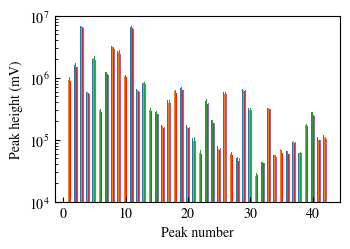

In [6]:
plt.style.use('stylesheet.mpltstyle_chromatogram')
fig, ax = plt.subplots(1,1, figsize = (3.5, 2.5))

width = 0.12
for i in range(-2,3):
    ax.bar(np.linspace(1+i*width,subset.shape[1]+i*width,subset.shape[1]), subset[i+2,:], label = 'Replicate '+str(i+3), linewidth=0.5, width = width)

ax.set_yscale('log')
ax.set_ylim(1E4,1E7)
ax.set_ylabel('Peak height (mV)')
ax.set_xlabel('Peak number')
# ax.legend()

plt.savefig('../Figures/chromatogram.pdf')
plt.show()